In [14]:
# imports
import psycopg2
import matplotlib.pyplot as plt
database = "amazon2"
user = "jas0n"
password = "test"
host = "localhost"  # Usually "localhost" if running locally
port = "5432"  # Default PostgreSQL port is 5432

import pandas as pd

In [2]:
# CSV Files
df_disney = pd.read_csv('../da_project_data/disney_plus_titles.csv')
df_hulu = pd.read_csv('../da_project_data/hulu_titles.csv')
df_netflix = pd.read_csv('../da_project_data/netflix_titles.csv')

In [3]:
connection = psycopg2.connect(
    database=database,
    user=user,
    password=password,
    host=host,
    port=port
)
cursor = connection.cursor()


In [4]:
# Create a Dataframe from the amazon_prime_titles sql file
# SQL command
sql_command = "SELECT * FROM amazon_prime_titles;"

cursor.execute("Select * FROM amazon_prime_titles LIMIT 0")
col_names = [desc[0] for desc in cursor.description]

# Execute the SQL command
cursor.execute(sql_command)

# Fetch the results (if any)
results = cursor.fetchall()
df_amazon = pd.DataFrame(results,columns=col_names)
df_amazon.set_index('index', inplace=True)
    
cursor.close()
connection.close()

In [5]:
# add a 'platform' column to each dataframe
df_amazon['platform'] = 'Amazon'
df_disney['platform'] = 'Disney+'
df_hulu['platform'] = 'HULU'
df_netflix['platform']='Netflix'

In [6]:
# Combine each Platform dataframe together to perform cross-platform analysis
df_combined = pd.concat([df_amazon,df_disney])
df_combined = pd.concat([df_combined,df_hulu])
df_combined = pd.concat([df_combined,df_netflix])

In [7]:
# Split the 'listed_in' column into a Category list then create rows for each distinct category to compare category counts
df_combined['category'] = df_combined['listed_in'].apply(lambda x: x.split(','))
# df_combined
df_combined.explode('category')
df_comb_exploded = df_combined.explode('category')

In [8]:
df_comb_exploded.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,platform,category
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,None,113 min,"Comedy, Drama",A small fishing village must procure a local d...,Amazon,Comedy
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,None,113 min,"Comedy, Drama",A small fishing village must procure a local d...,Amazon,Drama
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,Amazon,Drama
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,Amazon,International
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,None,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,Amazon,Action


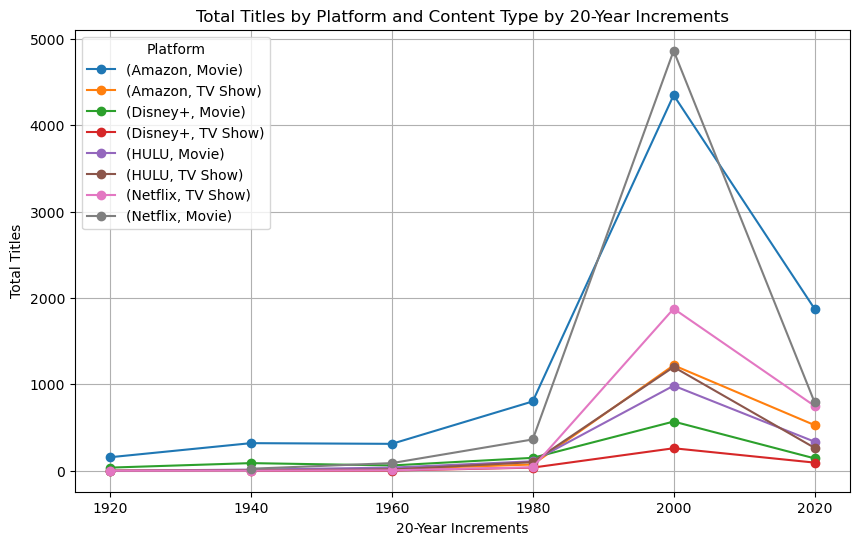

In [18]:
df_combined['20_year_increment'] = (df_combined['release_year'] // 20) * 20
df_combined['content_type'] = df_combined['type'].map(lambda x: 'Movie' if x == 'Movie' else 'TV Show')
grouped_data = df_combined.groupby(['platform', '20_year_increment', 'content_type']).size().reset_index(name='total_titles')
pivot_data = grouped_data.pivot(index='20_year_increment', columns=['platform', 'content_type'], values='total_titles')
pivot_data.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Total Titles by Platform and Content Type by 20-Year Increments')
plt.xlabel('20-Year Increments')
plt.ylabel('Total Titles')
plt.grid(True)
plt.legend(title='Platform')
plt.show()